In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv(r'D:\internship\Data Analytics\Retail Sales Analysis_utf.csv')

In [5]:
df.shape

(2000, 11)

In [7]:
df.describe()

,transactions_id,customer_id,age,quantiy,price_per_unit,cogs,total_sale
count,2000.000000,2000.000000,1990.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1000.500000,66.341500,41.343216,2.512769,180.117677,95.023886,456.544817
std,577.494589,44.937185,13.668167,1.132708,189.685225,121.898695,560.101381
min,1.000000,1.000000,18.000000,1.000000,25.000000,6.250000,25.000000
25%,500.750000,24.000000,29.000000,1.000000,30.000000,13.000000,60.000000
50%,1000.500000,69.000000,42.000000,3.000000,50.000000,27.500000,150.000000
75%,1500.250000,102.000000,53.000000,4.000000,300.000000,147.000000,900.000000
max,2000.000000,155.000000,64.000000,4.000000,500.000000,620.000000,2000.000000


In [8]:
df.isnull().sum()

transactions_id     0
sale_date           0
sale_time           0
customer_id         0
gender              0
age                10
category            0
quantiy             3
price_per_unit      3
cogs                3
total_sale          3
dtype: int64

In [15]:
df.dropna(subset=['age'], inplace=True)         #drop age null values

In [16]:
df.shape

(1990, 11)

In [17]:
df.isnull().sum()      #checking age column

transactions_id    0
sale_date          0
sale_time          0
customer_id        0
gender             0
age                0
category           0
quantiy            3
price_per_unit     3
cogs               3
total_sale         3
dtype: int64

In [23]:
df['quantiy']= df['quantiy'].fillna(0)                    #correct typo error in column
df['price_per_unit']= df['price_per_unit'].fillna(0)      #price, cogs, total sales will with zero
df['cogs']= df['cogs'].fillna(0)
df['total_sale']= df['total_sale'].fillna(0)

In [24]:
df.isnull().sum()     #checking again

transactions_id    0
sale_date          0
sale_time          0
customer_id        0
gender             0
age                0
category           0
quantiy            0
price_per_unit     0
cogs               0
total_sale         0
dtype: int64

In [38]:
df.rename(columns={'quantiy' : 'quantity'},inplace=True)             #typo error in quantity column so i coorect it
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')
df['sale_time'] = pd.to_datetime(df['sale_time'], format='%H:%M:%S', errors='coerce').dt.time
df['datetime'] = pd.to_datetime(df['sale_date'].astype(str) + ' ' + df['sale_time'].astype(str), errors='coerce') #combining sale_date & sale_time to create datetime
df.set_index('datetime', inplace=True)
df = df.sort_values('datetime')              #

In [37]:
# measures KPI
#total sales
total_sale = df['total_sale'].sum()
print(f'Total Sale: {total_sale}')

#Revenue per Category
revenue_per_category = df.groupby('category') ['total_sale'].sum()
print('\nRevenue per Category:')
print(revenue_per_category)

#Average order value
aov = df['total_sale'].mean()
print(f'\nAverage Order Value (AOV):{aov}')

Total Sale: 908230.0

Revenue per Category:
category
Beauty         286790.0
Clothing       309995.0
Electronics    311445.0
Name: total_sale, dtype: float64

Average Order Value (AOV):456.3969849246231


In [61]:
#Find trend, pattern and Seasonality

In [56]:
df['month'] = df.index.month
df['weekday'] = df.index.day_name()
df['hour'] = df.index.hour

<function matplotlib.pyplot.show(close=None, block=None)>

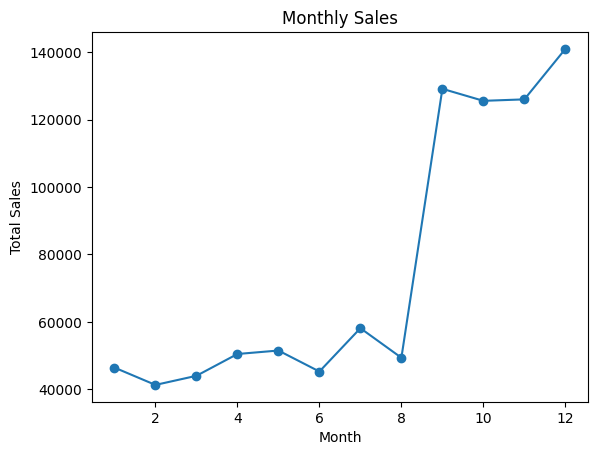

In [57]:
#monthly sales 
monthly_sales = df.groupby('month') ['total_sale'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

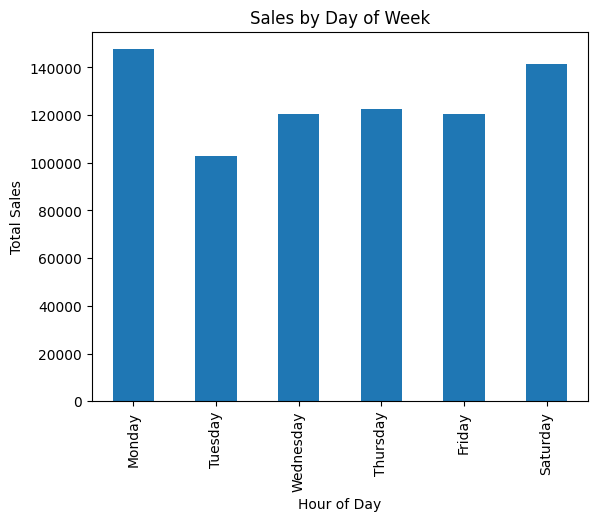

In [58]:
#sales by day of week
weekday_sales = df.groupby('weekday') ['total_sale'].sum()
weekday_sales = weekday_sales.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
weekday_sales.plot(kind='bar',title='Sales by Day of Week')
plt.ylabel('Total Sales')
plt.xlabel('Hour of Day')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

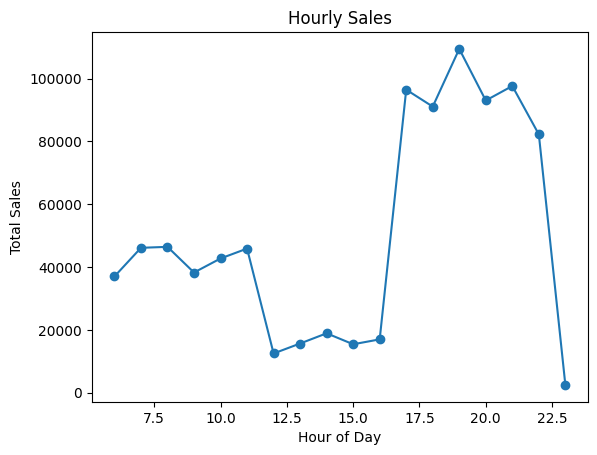

In [59]:
#Hourly sales
hourly_sales = df.groupby('hour') ['total_sale'].sum()
hourly_sales.plot(kind='line',marker='o', title='Hourly Sales')
plt.ylabel('Total Sales')
plt.xlabel('Hour of Day')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

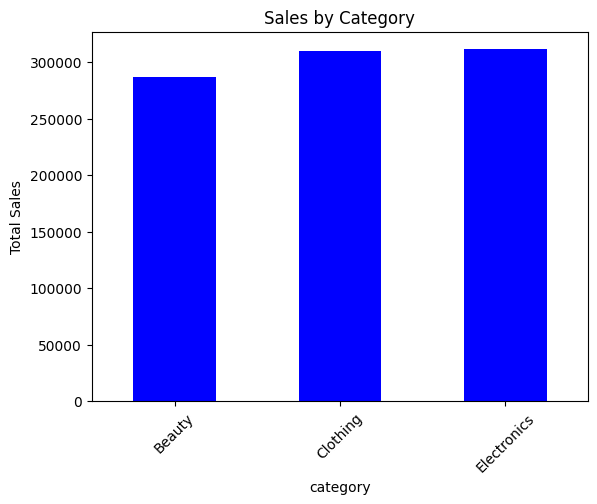

In [60]:
#category Sales 
category_sales = df.groupby('category') ['total_sale'].sum()
category_sales.plot(kind ='bar',color='blue', title='Sales by Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show